## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [46]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
df = pd.DataFrame(data=adult.data.features, columns=adult.feature_names)
df['income'] = adult.data.targets
df.to_csv('adult_data.csv', index=False)

fnlwgt - an estimate of the number of individuals in the population with the same demographics as this individual

In [47]:
df = pd.read_csv('adult_data.csv')
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


### <span style="color: #8B0000;">Income should have only two unique values. The following examines why there are 4 unique values and then repairs the data.</span>

In [49]:
unique_income = df['income'].unique()
print(unique_income)
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(df['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [50]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unikalne wartości dla kolumny '{col}': {unique_values}")

Unikalne wartości dla kolumny 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unikalne wartości dla kolumny 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unikalne wartości dla kolumny 'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977]
Unikalne wartości dla kolumny 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unikalne wartości dla kolumny 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unikalne wartości dla kolumny 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unikaln

### <span style="color: #8B0000;">cleaning incorrect values for other columns</span>

In [51]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [52]:
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

In [53]:
import pandas as pd

nan_rows_count = df.isna().any(axis=1).sum()
print(f'Number of rows containing at least one NaN value: {nan_rows_count}')

Number of rows containing at least one NaN value: 3620


In [54]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


### <span style="color: #8B0000;">We can see that the 99999 values are very far from the rest, they are outliers and look like incorrect data. We replace them with the average of people with an income of over 50k.</span>

In [55]:
(df['capital-gain'] == 99999).sum()

244

c:\users\artur\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


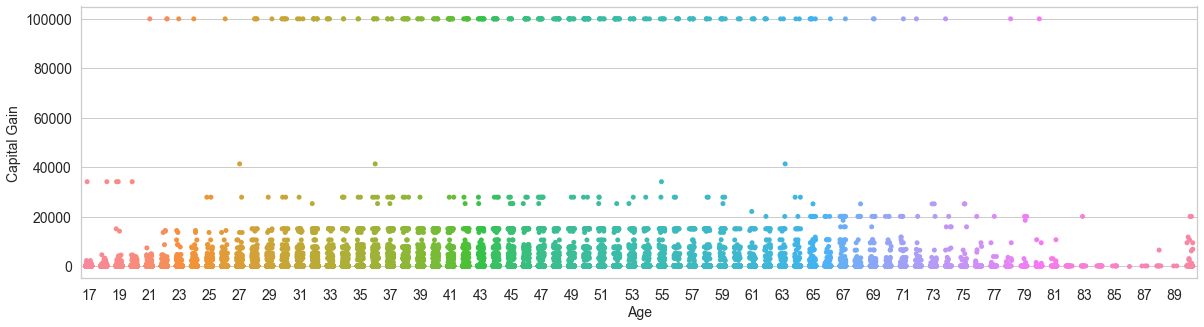

In [56]:
plt.figure(figsize=(20, 5))
ax = sns.stripplot('age', 'capital-gain', data=df, jitter=0.2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Capital Gain', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 1:  
        label.set_visible(False) 

plt.savefig("EDA_plots\capital_gain_vs_age.jpg", bbox_inches='tight')
plt.show()

In [57]:
df[df['capital-gain'] == 99999]['income'].value_counts()

>50K    244
Name: income, dtype: int64

In [58]:
df_without_99999 = df[df['capital-gain'] != 99999]
df_without_99999.groupby('income')['capital-gain'].mean()

income
<=50K     147.010308
>50K     1996.145853
Name: capital-gain, dtype: float64

In [59]:
mean_gain = df_without_99999[df_without_99999['income'] == '>50K']['capital-gain'].mean()
print(mean_gain)
df['capital-gain'] = df['capital-gain'].replace({99999: mean_gain})

1996.1458533601328


c:\users\artur\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


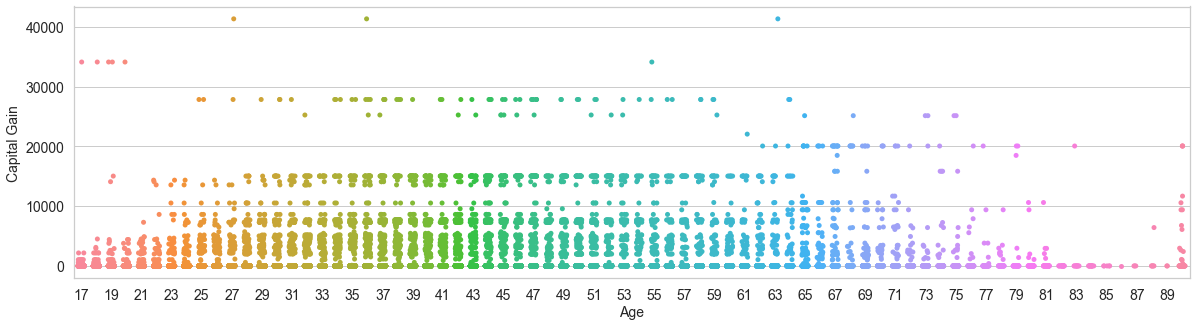

In [60]:
plt.figure(figsize=(20, 5))
ax = sns.stripplot('age', 'capital-gain', data=df, jitter=0.2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Capital Gain', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 1:
        label.set_visible(False) 

plt.savefig("EDA_plots\capital_gain_vs_age_2.jpg", bbox_inches='tight')
plt.show()

## Basic statistics for quantitative features

In [61]:
df_quantitative = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
description = df_quantitative.describe(include='all')
description.round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,589.47,87.5,40.42
std,13.71,105604.03,2.57,2532.27,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,41310.00,4356.0,99.00


## Basic statistics for qualitative features


In [62]:
df_qualitative = df.drop(columns=df_quantitative.columns)
description_qualitative = df_qualitative.describe(include='all')
description_qualitative.round(4)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


### <span style="color: #8B0000;">After checking the background of the people in the dataset, we found that almost 44,000 are from the USA. For this reason, we divide derivation into US and otchers.</span>

In [63]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [64]:
df['native-country'] = df['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'other')

In [65]:
df_to_ML_model = df.drop('education-num', axis=1)


In [66]:
df['native-country'].value_counts()

USA      43832
other     5010
Name: native-country, dtype: int64

In [22]:
df_to_ML_model.to_csv('data_preprocessed.csv', index=False)

## Checking the balance of the dataset

In [67]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

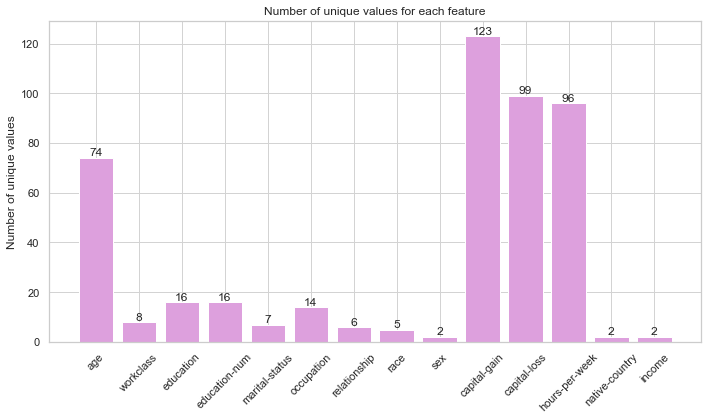

In [68]:
unique_counts = df.drop('fnlwgt', axis=1).nunique() 
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_counts.index, unique_counts.values, color='plum')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom',fontsize=12)
    
plt.title('Number of unique values for each feature')
plt.ylabel('Number of unique values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color='lightgray')
plt.show()

## Correlation between features for numeric data

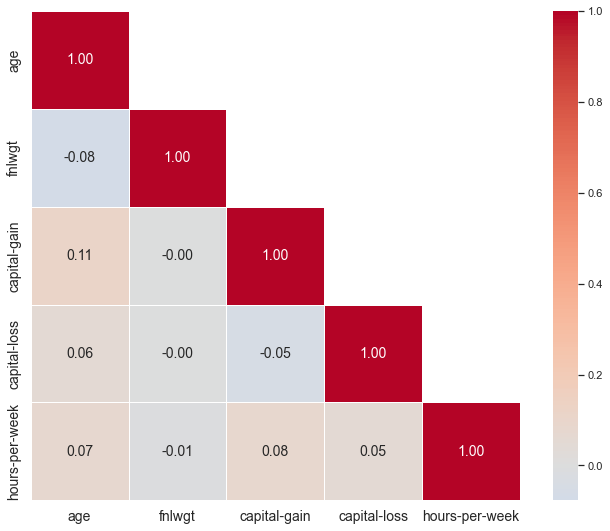

In [69]:
plt.figure(figsize=(12,9))

corr = df_quantitative.drop('education-num',axis=1).corr(method='pearson')
heat_map = sns.heatmap( corr,
    center=0, 
    cmap="coolwarm", 
    square=True,
    annot=True,
    fmt=".2f",
    mask=np.triu(df_quantitative.drop('education-num',axis=1).corr(method='pearson'), k=1),
                       linewidth=1, linecolor='white' ,annot_kws={"size": 14})
#plt.title('Pearson correlation between variables', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.savefig("EDA_plots\\Pearson_corr.pdf", bbox_inches='tight')

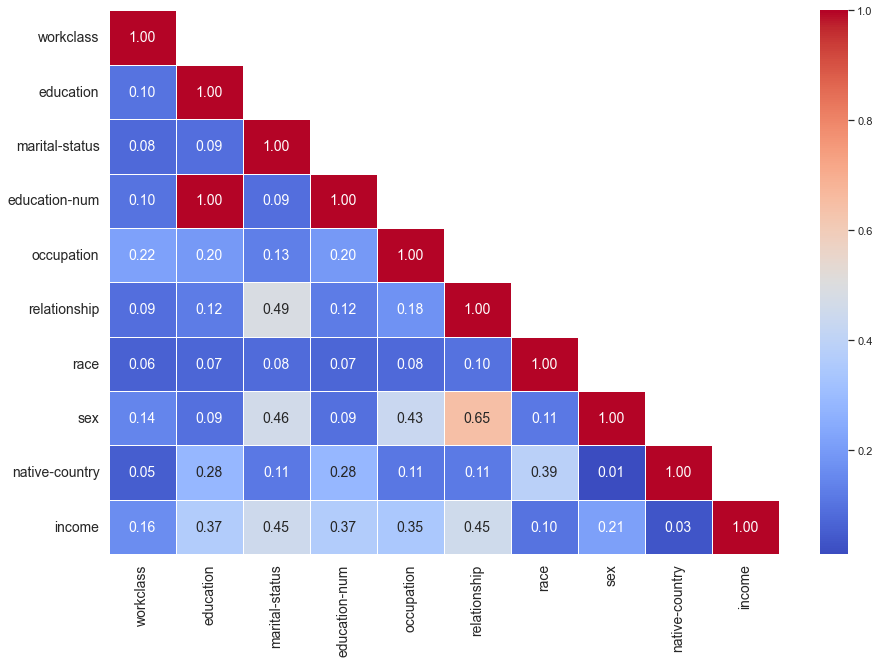

In [70]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # total sum of the matrix
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

columns_to_analyze = ['workclass', 'education', 'marital-status', 'education-num',
                      'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
correlation_matrix = pd.DataFrame(index=columns_to_analyze, columns=columns_to_analyze)


for col1 in columns_to_analyze:
    for col2 in columns_to_analyze:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            correlation_matrix.loc[col1, col2] = cramers_v(confusion_matrix.values)
        else:
            correlation_matrix.loc[col1, col2] = 1.0 
            
plt.figure(figsize=(15,10))
correlation_matrix = correlation_matrix.astype(float)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",  
            mask=np.triu(correlation_matrix, k=1),linewidth=1, linecolor='white' ,annot_kws={"size": 14})
#plt.title("Cramér's V correlation", fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)

plt.savefig("EDA_plots\\Cramer_corr.pdf", bbox_inches='tight')
plt.show()

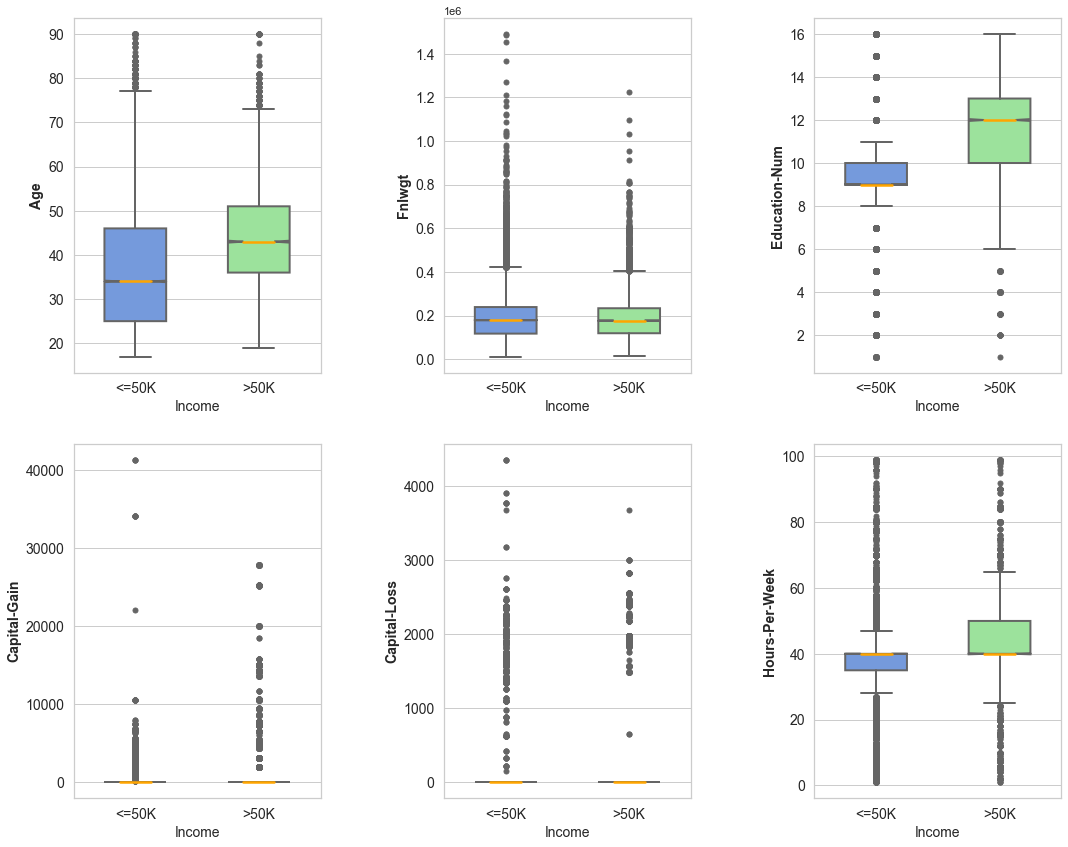

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 35))

for i, col in enumerate(df_quantitative.columns, 1):
    plt.subplot(6, 3, i)  
    sns.boxplot(data=df, x='income', y=col, linewidth=2,
                palette={"<=50K": "cornflowerblue", ">50K": "lightgreen"}, width=0.5, notch=True, #showfliers=False
               medianprops=dict(linestyle='-', linewidth=2.5, color='orange'),
               flierprops={"marker": 'o'})
    plt.ylabel(col.title(), fontsize=14, weight='bold')
    plt.xlabel('Income',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.2,wspace=0.5) 

plt.savefig("EDA_plots\\boxplots_EDA.jpg", bbox_inches='tight')
plt.show()

## Split dataset by income 

In [33]:
large_income = df.loc[df['income'] == '>50K']
small_income = df.loc[df['income'] == '<=50K']

In [34]:
large_income['workclass'].value_counts()
small_income['workclass'].value_counts()

Private             26519
Self-emp-not-inc     2785
Local-gov            2209
State-gov            1451
Federal-gov           871
Self-emp-inc          757
Without-pay            19
Never-worked           10
Name: workclass, dtype: int64

In [35]:

grouped = df.groupby(['education', 'income']).size().unstack()
grouped_per = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_per

income,<=50K,>50K
education,,
10th,93.736501,6.263499
11th,94.922737,5.077263
12th,92.694064,7.305936
1st-4th,96.761134,3.238866
5th-6th,94.695481,5.304519
7th-8th,93.507853,6.492147
9th,94.576720,5.423280
Assoc-acdm,74.203623,25.796377
Assoc-voc,74.672489,25.327511


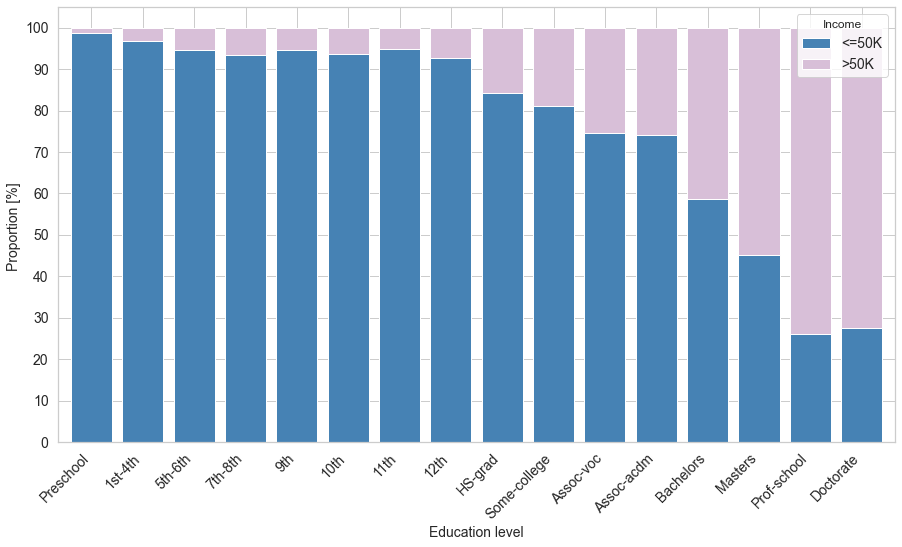

In [36]:
education_sorted = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college',  'Assoc-voc','Assoc-acdm', 'Bachelors', 'Masters',
     'Prof-school','Doctorate',]

grouped = df.groupby(['education', 'income']).size().unstack()
grouped_per = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_per = grouped_per.reindex(education_sorted)


colors = ['steelblue', 'thistle']
grouped_per.plot(kind='bar', 
                    stacked=True, 
                    color=colors,
                    figsize=(15, 8),width=0.8,fontsize=14)

plt.legend(title='Income', loc='upper right',fontsize=14)
plt.xticks(ticks=range(len(education_sorted)), labels=education_sorted, rotation=45, ha='right')
plt.xlabel("Education level",fontsize=14)
plt.yticks(range(0, 101, 10), fontsize=14)
plt.ylabel("Proportion [%] ",fontsize=14)
plt.show()

In [37]:
df_qualitative.columns[:-1]

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

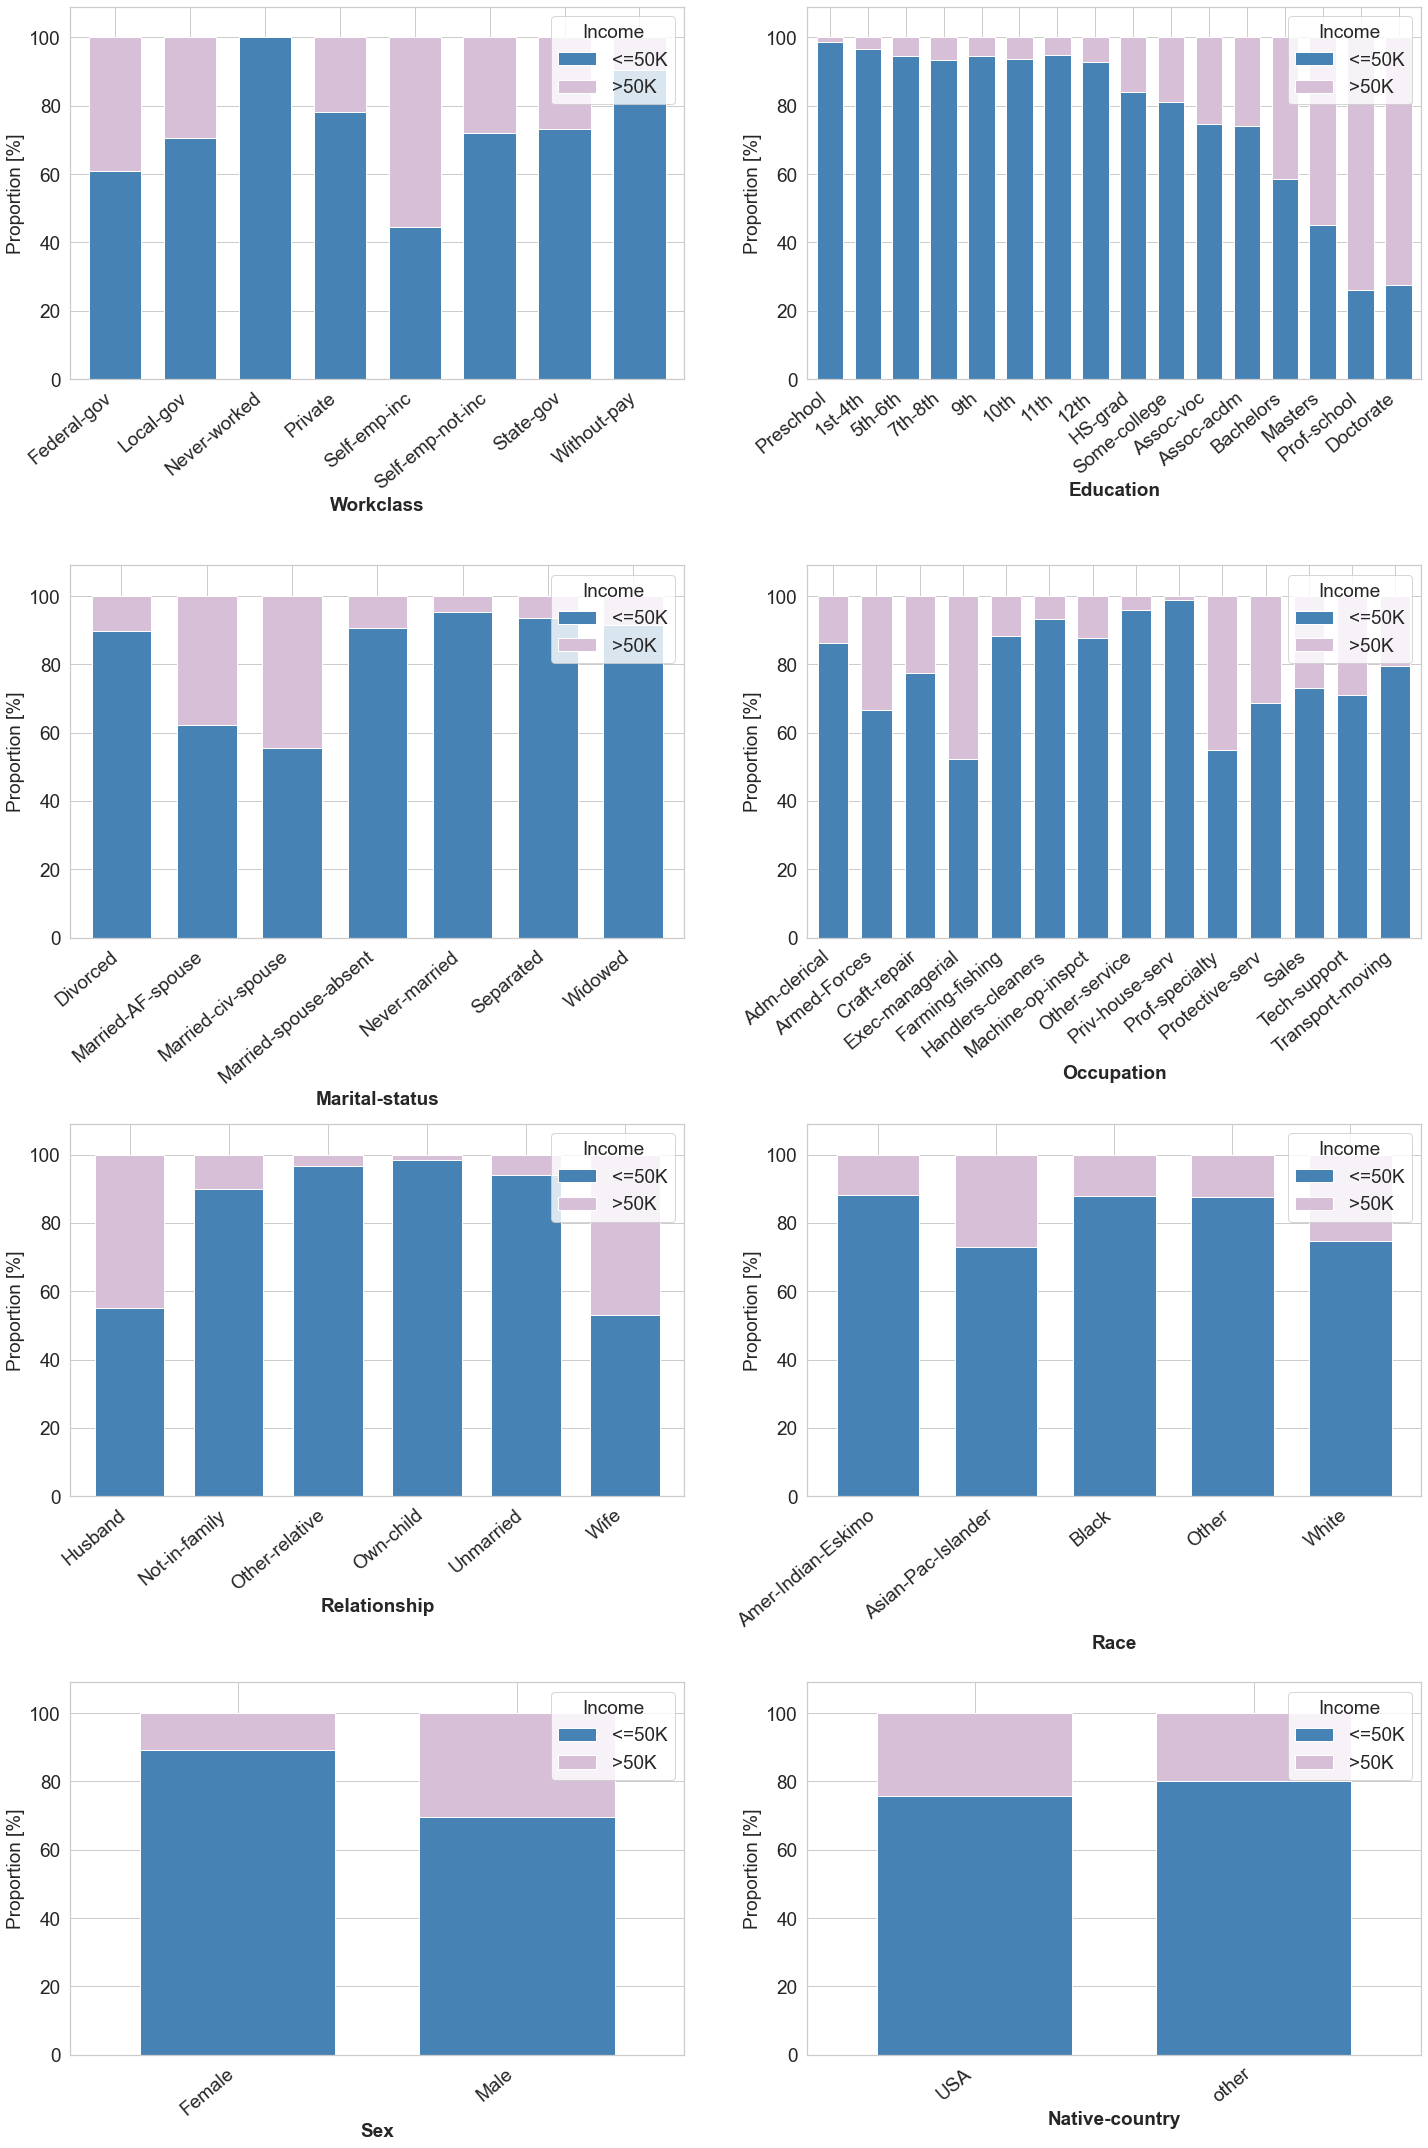

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors = ['steelblue', 'thistle']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))

features = df_qualitative.columns[:-1]
for i, feature in enumerate(features):
    
    ax = axes[i // 2, i % 2]
    
    if feature == 'education':
        grouped = df.groupby([pd.Categorical(df['education'], categories=education_sorted, ordered=True), 'income']).size().unstack()
    else:
        grouped = df.groupby([feature, 'income']).size().unstack()
        
    grouped_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    grouped_percentages.plot(kind='bar', stacked=True, color=colors, width=0.7, fontsize=15, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=19, rotation=40, ha='right')
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(f"{feature.capitalize()}", fontsize=19,weight='bold')
    ax.set_ylabel("Proportion [%]", fontsize=19)
    ax.legend(title='Income', loc='upper right', fontsize=19,title_fontsize=19)
    
    ax.set_ylim(0, 109)
    ax.tick_params(axis='y', labelsize=19)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5,wspace=0.2) 

plt.savefig("EDA_plots\\Proportion_of_features_EDA.pdf", bbox_inches='tight')
plt.show()


In [39]:
df_quantitative = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','income']]
x_limits = {
    'education-num': (0, 20),
    'capital-gain': (-0, 5000),
    'capital-loss': (0, 1000),
    'hours-per-week': (0, 100)
}

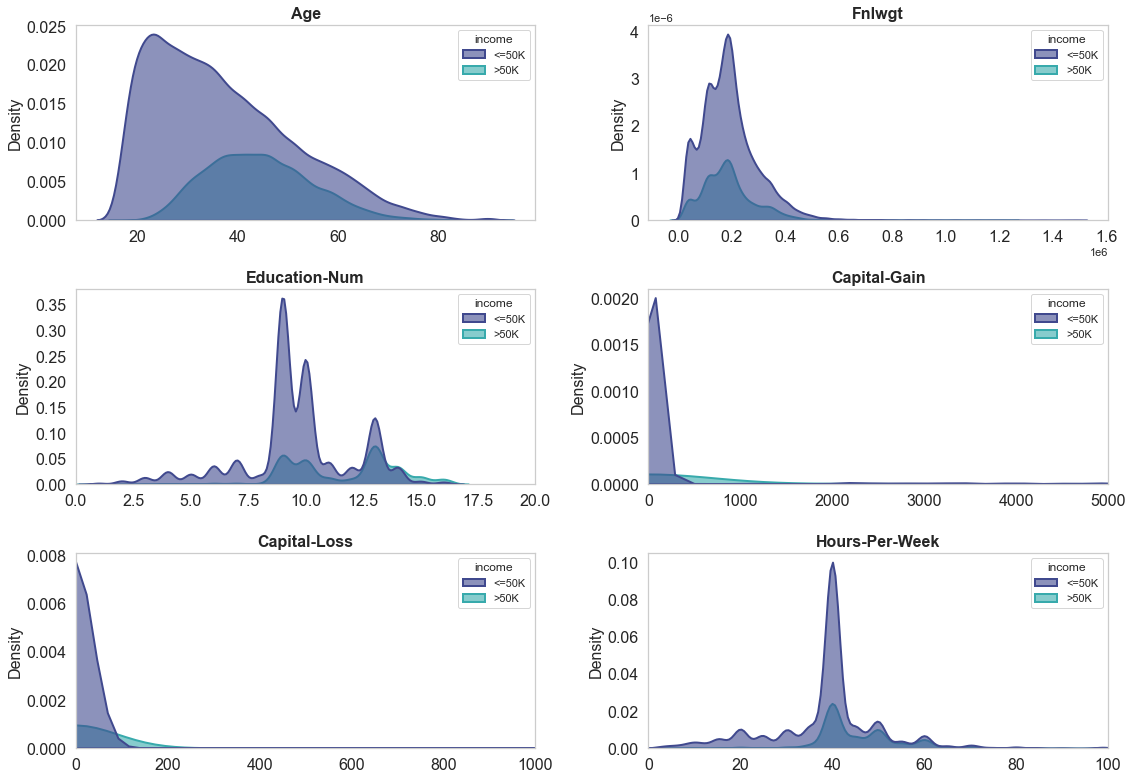

In [40]:
plt.figure(figsize=(15, 40))
index = 1
for column in df_quantitative.columns[:-1]: 
    plt.subplot(11, 2, index)
    sns.kdeplot(data=df_quantitative, x=column, 
                shade=True, hue='income', linewidth=2, palette='mako', alpha=0.6)
    plt.title(column.title(), fontsize=16, weight='bold')
    
    x_limit = x_limits.get(column, None)
    if x_limit:
        plt.xlim(x_limit)
    
    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel(ylabel='Density', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.grid()
    index += 1

plt.gcf().set_size_inches(16, 40)
plt.savefig("EDA_plots\\Density_EDA.pdf", bbox_inches='tight')
plt.show()

(0.0, 40000.0)

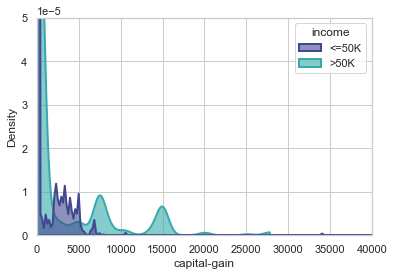

In [41]:
sns.kdeplot(data=df, x=df['capital-gain'],
                shade=True, hue='income', linewidth=2, palette='mako', alpha=0.6,cut=0)
plt.ylim(0,0.00005)
plt.xlim(0,40000)
    